<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9

Classification report:
               precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.8182    0.9000    0.8571        10
   virginica     0.8889    0.8000    0.8421        10

    accuracy                         0.9000        30
   macro avg     0.9024    0.9000    0.8997        30
weighted avg     0.9024    0.9000    0.8997        30



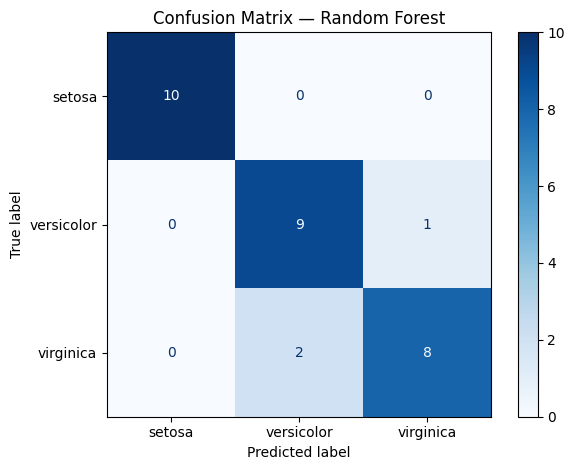

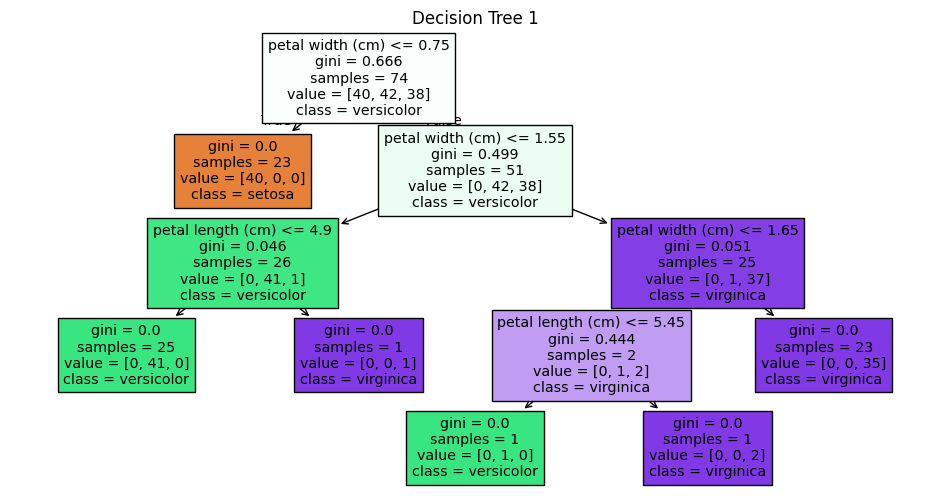

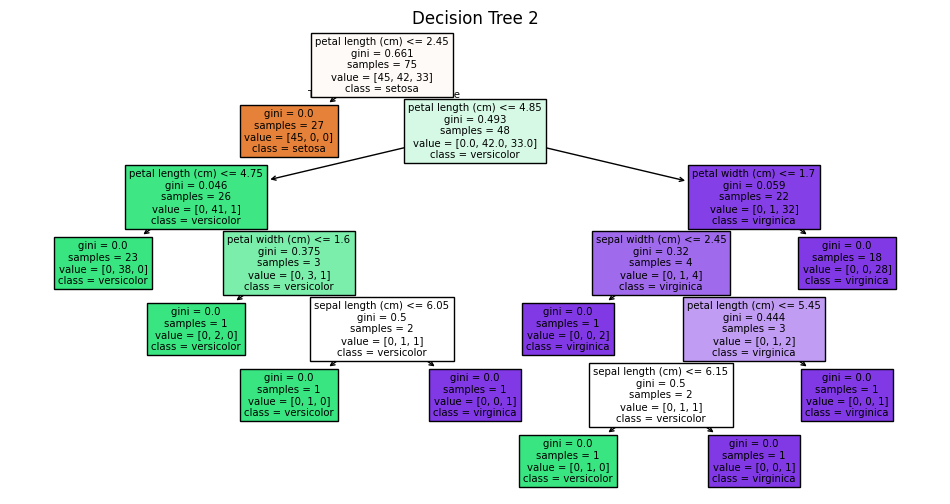

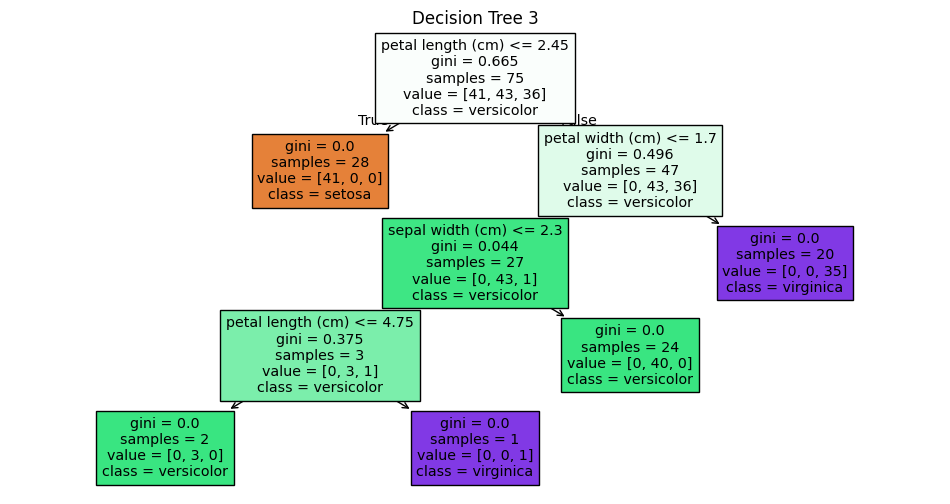

In [24]:
# exp_random_forest_simple.py
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
data = load_iris(as_frame=True)
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

# 2. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Random Forest (default, no scaling required)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predict & metrics
y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=class_names, digits=4))


# 6. Simple visual 2 — Confusion matrix (compact)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.show()

# Visualize each tree      IF ASKED DO IT ONLY
from sklearn.tree import plot_tree
for i in range(3):      # visualize 3 trees only
    plt.figure(figsize=(12,6))
    plot_tree(
        model.estimators_[i],
        feature_names=feature_names, # Corrected from features.columns to feature_names
        class_names=class_names, # Changed from model.classes_ to class_names
        filled=True
    )
    plt.title(f"Decision Tree {i+1}")
    plt.show()